In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import sys
from tqdm.auto import tqdm
import pandas as pd
import networkx as nx

In [3]:
project_root = os.path.abspath(
    os.path.join("C:/Users/jllgo/OneDrive/Documentos/UFMG/MSc & MSI 2/MatchSegmentation")
)
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from src.pass_networks.process_intervals import load_graphs
from src.pass_networks.pass_network import calculate_metrics 
from src.pass_networks.custom_metrics import calculate_average_path_legth_target
from src.pass_networks.custom_metrics import calculate_ffl
from src.pass_networks.custom_metrics import calculate_simrank
from src.pass_networks.custom_metrics import calculate_wasserstein_distance
from src.pass_networks.custom_metrics import calculate_modularity

# Get Graphs

In [5]:
PROCESSED_DATA_PATH = "../data/processed/PL-22-23"
CSV_DATA_PATH = "../data/csv"

In [6]:
games = os.listdir(PROCESSED_DATA_PATH)
game_ids = [game.split('.')[0] for game in games]
print(f"Games to process: {len(game_ids)}")

Games to process: 30


In [7]:
matches = []

for match_id in tqdm(game_ids, desc="Loading Pre-Processed Graphs", total=len(game_ids)):
    match_graphs = load_graphs(match_id, PROCESSED_DATA_PATH)
    matches.append((match_id,match_graphs))

Loading Pre-Processed Graphs:   0%|          | 0/30 [00:00<?, ?it/s]

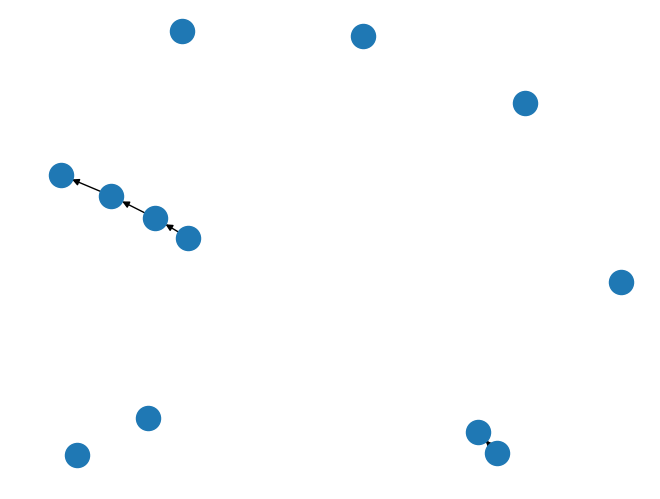

In [11]:
G = matches[0][1][0]['3']
G1 = matches[0][1][1]['11']
nx.draw(G)

# Graph Stream

In [12]:
selected_metrics = {
    "Density": nx.density,
    "Average Clustering": nx.average_clustering,
    "Betweenness Centrality": nx.betweenness_centrality,
    "Closeness Centrality": nx.closeness_centrality,
    "Averge Path Length": calculate_average_path_legth_target,
    "FFL": calculate_ffl,
    "Modularidade": calculate_modularity
}

In [13]:
distance_metrics = {    
    "GED": nx.graph_edit_distance,
    "SimRank": calculate_simrank,
    "Wasserstein Distance": calculate_wasserstein_distance
}

In [17]:
matches[0][1][0]['3'].nodes

NodeView((-1, 1, 27, 5, 4, 6, 7, 2, 11, 41, 44, 31))

In [18]:
streams = []

for match_id, grafos_por_intervalo in tqdm(matches, desc="Calculating Metrics", total=len(matches)):
    # Estrutura para armazenar grafos e métricas organizados por equipe
    grafos = {}
    metricas = {}

    # Iterar sobre os intervalos de tempo (listas de grafos)
    for intervalo in grafos_por_intervalo:
        for equipe_id, grafo in intervalo.items():
            # Inicializar listas para cada equipe, se ainda não existirem
            if equipe_id not in grafos:
                grafos[equipe_id] = []
                metricas[equipe_id] = []

            # Adicionar o grafo ao intervalo correspondente da equipe
            grafos[equipe_id].append(grafo)

            # Adicionar métricas calculadas para o grafo
            metricas[equipe_id].append(calculate_metrics(grafo, selected_metrics))

    # Adicionar os dados transformados ao resultado final
    streams.append({
        "match_id": match_id,
        "grafos": grafos,
        "metrics": metricas,
    })

print(f"Generated {len(streams)} Graph Streams")

Calculating Metrics:   0%|          | 0/30 [00:00<?, ?it/s]

Generated 30 Graph Streams


In [21]:
streams[0]['metrics']['3']

[{'Density': 0.03787878787878788,
  'Average Clustering': 0.0,
  'Betweenness Centrality': {-1: 0.0,
   1: 0.01818181818181818,
   27: 0.0,
   5: 0.0,
   4: 0.0,
   6: 0.0,
   7: 0.0,
   2: 0.01818181818181818,
   11: 0.0,
   41: 0.0,
   44: 0.0,
   31: 0.0},
  'Closeness Centrality': {-1: 0.0,
   1: 0.12121212121212122,
   27: 0.09090909090909091,
   5: 0.0,
   4: 0.0,
   6: 0.0,
   7: 0.0,
   2: 0.09090909090909091,
   11: 0.13636363636363635,
   41: 0.09090909090909091,
   44: 0.0,
   31: 0.0},
  'Averge Path Length': 0.0,
  'FFL': 0,
  'Modularidade': 0.4489795918367347},
 {'Density': 0.030303030303030304,
  'Average Clustering': 0.0,
  'Betweenness Centrality': {-1: 0.0,
   1: 0.0,
   27: 0.0,
   5: 0.01818181818181818,
   4: 0.01818181818181818,
   6: 0.0,
   7: 0.0,
   2: 0.0,
   11: 0.0,
   41: 0.0,
   44: 0.0,
   31: 0.0},
  'Closeness Centrality': {-1: 0.0,
   1: 0.13636363636363635,
   27: 0.0,
   5: 0.09090909090909091,
   4: 0.20454545454545453,
   6: 0.0,
   7: 0.0,
   2: